
--- Section 1: Tensor Manipulations & Reshaping ---
Original Tensor:
 tf.Tensor(
[[0.9256898  0.83760154 0.6962979  0.60998106 0.4545523  0.9153092 ]
 [0.6456189  0.6361064  0.79558086 0.5108619  0.24129856 0.43302667]
 [0.26296234 0.8229575  0.783857   0.9200847  0.31692398 0.13973999]
 [0.5395348  0.3331108  0.79373395 0.20428932 0.90292346 0.5351175 ]], shape=(4, 6), dtype=float32)
Rank: 2
Shape: (4, 6)

Reshaped Tensor (2, 3, 4):
 tf.Tensor(
[[[0.9256898  0.83760154 0.6962979  0.60998106]
  [0.4545523  0.9153092  0.6456189  0.6361064 ]
  [0.79558086 0.5108619  0.24129856 0.43302667]]

 [[0.26296234 0.8229575  0.783857   0.9200847 ]
  [0.31692398 0.13973999 0.5395348  0.3331108 ]
  [0.79373395 0.20428932 0.90292346 0.5351175 ]]], shape=(2, 3, 4), dtype=float32)
Transposed Tensor (3, 2, 4):
 tf.Tensor(
[[[0.9256898  0.83760154 0.6962979  0.60998106]
  [0.26296234 0.8229575  0.783857   0.9200847 ]]

 [[0.4545523  0.9153092  0.6456189  0.6361064 ]
  [0.31692398 0.13973999 0.5395348  0

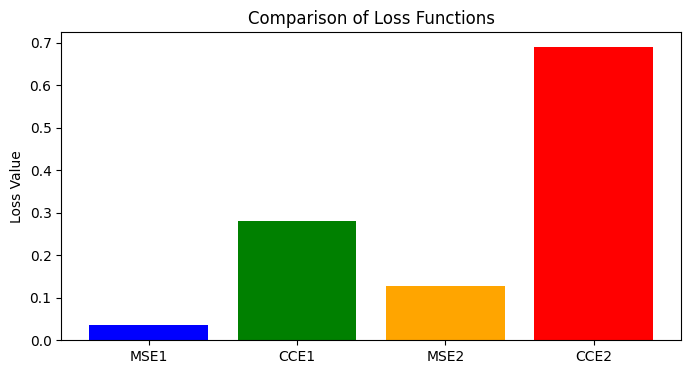


--- Section 3: Train a Neural Network & Log to TensorBoard ---
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8805 - loss: 0.4231 - val_accuracy: 0.9568 - val_loss: 0.1445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9637 - loss: 0.1218 - val_accuracy: 0.9639 - val_loss: 0.1171
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9779 - loss: 0.0756 - val_accuracy: 0.9715 - val_loss: 0.0889
Epoch 4/5
 251/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9831 - loss: 0.0530

In [ ]:
 #Home Assignment 1: CS5720 Neural Networks and Deep Learning

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from datetime import datetime
import os

# Section 1: Tensor Manipulations & Reshaping
print("\n--- Section 1: Tensor Manipulations & Reshaping ---")
tensor = tf.random.uniform((4, 6))
print("Original Tensor:\n", tensor)
print("Rank:", tf.rank(tensor).numpy())
print("Shape:", tensor.shape)

reshaped = tf.reshape(tensor, (2, 3, 4))
print("\nReshaped Tensor (2, 3, 4):\n", reshaped)
transposed = tf.transpose(reshaped, perm=[1, 0, 2])
print("Transposed Tensor (3, 2, 4):\n", transposed)

broadcast_tensor = tf.constant([[1., 2., 3., 4.]])
print("\nBroadcast Tensor:\n", broadcast_tensor)

added_tensor = reshaped + broadcast_tensor
print("Broadcasted and Added Tensor:\n", added_tensor)

print("\nBroadcasting in TensorFlow allows operations on tensors of different shapes, automatically expanding the smaller tensor to match dimensions.")

# Section 2: Loss Functions & Hyperparameter Tuning
print("\n--- Section 2: Loss Functions & Hyperparameter Tuning ---")
y_true = tf.constant([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=tf.float32)
y_pred1 = tf.constant([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]], dtype=tf.float32)
y_pred2 = tf.constant([[0.7, 0.2, 0.1], [0.3, 0.6, 0.1], [0.4, 0.3, 0.3]], dtype=tf.float32)

mse = MeanSquaredError()
cce = CategoricalCrossentropy()

mse1 = mse(y_true, y_pred1).numpy()
cce1 = cce(y_true, y_pred1).numpy()
mse2 = mse(y_true, y_pred2).numpy()
cce2 = cce(y_true, y_pred2).numpy()

print("\nLoss Values:")
print(f"MSE1: {mse1}, CCE1: {cce1}")
print(f"MSE2: {mse2}, CCE2: {cce2}")

labels = ['MSE1', 'CCE1', 'MSE2', 'CCE2']
values = [mse1, cce1, mse2, cce2]

plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparison of Loss Functions')
plt.ylabel('Loss Value')
plt.savefig('loss_comparison.png')
plt.show()

# Section 3: Train a Neural Network and Log to TensorBoard
print("\n--- Section 3: Train a Neural Network & Log to TensorBoard ---")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

log_dir = os.path.join("logs/fit", datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat), callbacks=[tensorboard_callback])

print("\nTo visualize in TensorBoard, run:")
print(f"tensorboard --logdir={log_dir}")
